In [1]:
url1 = "https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5"
url2 = "https://view.inews.qq.com/g2/getOnsInfo?name=disease_other"
url3 = "https://api.inews.qq.com/newsqa/v1/automation/modules/list?modules=FAutoCountryConfirmAdd,WomWorld,WomAboard"

In [2]:
import numpy as np  #导入必要的库函数
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import requests
import json
from pyecharts.charts import Map, Geo
from PIL import Image

In [3]:
url1 = "https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5"
resp=requests.get(url1)
listdata=[]
listdata=resp.json()
listdata1=json.loads(listdata['data']) #把'data'转换成字典类型方便分析

In [4]:
#从文件中读取中国疫情的整体情况
listtime=listdata1['lastUpdateTime']
pd_china=pd.DataFrame()
pd1=pd.DataFrame(listdata1['chinaTotal'],index=['chinaTotal'], columns=['confirm', 'heal','dead','suspect','nowConfirm','nowSevere','importedCase','noInfect'])
pd_china=pd_china.append(pd1)
pd1=pd.DataFrame(listdata1['chinaAdd'],index=['chinaAdd'], columns=['confirm', 'heal','dead','suspect','nowConfirm','nowSevere','importedCase','noInfect'])
pd_china=pd_china.append(pd1)
pd_china['lastUpdateTime']=listtime
pd_china=pd_china.rename(columns={"confirm": "累计确诊", "heal": "治愈","dead":"累计死亡","suspect":"疑是患者","nowConfirm":"现有患者","importedCase":"境外输入","noInfect":"无症状感染者","lastUpdateTime":"最近更新时间","nowSevere":"重症患者"})
pd_china=pd_china.rename(index={"chinaTotal":"中国累计","chinaAdd":"中国新增"})
pd_china

,累计确诊,治愈,累计死亡,疑是患者,现有患者,重症患者,境外输入,无症状感染者,最近更新时间
中国累计,359457,139554,8067,12,211836,9,15606,2407,2022-03-08 21:54:13
中国新增,20961,498,571,-1,19892,-2,150,443,2022-03-08 21:54:13


In [5]:
areaTree=listdata1['areaTree']
china_data=areaTree[0]['children']  #获得中国各省市数据
china_data
china_list = []
for a in range(len(china_data)):
    province = china_data[a]['name']   #得到所有的省
    province_list = china_data[a]['children']   #得到每个省的城市列表
    for b in range(len(province_list)):
        city = province_list[b]['name']
        total = province_list[b]['total']
        today = province_list[b]['today']
        china_dict = {}              #将每个城市的信息用字典存储
        china_dict['province'] = province
        china_dict['city'] = city
        china_dict['total'] = total
        china_dict['today'] = today
        china_list.append(china_dict)
china_data = pd.DataFrame(china_list)
china_data['最近更新时间']=listtime
print('各省各地的疫情情况')
china_data

各省各地的疫情情况


,province,city,total,today,最近更新时间
0,香港,地区待确认,"{'nowConfirm': 201399, 'confirm': 226878, 'dea...","{'confirm': 20499, 'confirmCuts': 0, 'isUpdate...",2022-03-08 21:54:13
1,台湾,地区待确认,"{'nowConfirm': 6327, 'confirm': 20922, 'dead':...","{'confirm': 82, 'confirmCuts': 0, 'isUpdated':...",2022-03-08 21:54:13
2,广东,境外输入,"{'nowConfirm': 975, 'confirm': 3305, 'dead': 0...","{'confirm': 47, 'confirmCuts': 0, 'isUpdated':...",2022-03-08 21:54:13
3,广东,深圳,"{'nowConfirm': 320, 'confirm': 751, 'dead': 3,...","{'confirm': 13, 'confirmCuts': 0, 'isUpdated':...",2022-03-08 21:54:13
4,广东,东莞,"{'nowConfirm': 177, 'confirm': 305, 'dead': 1,...","{'confirm': 31, 'confirmCuts': 0, 'isUpdated':...",2022-03-08 21:54:13
...,...,...,...,...,...
478,贵州,黔东南州,"{'nowConfirm': 0, 'confirm': 10, 'dead': 0, 's...","{'confirm': 0, 'confirmCuts': 0, 'isUpdated': ...",2022-03-08 21:54:13
479,贵州,黔西南州,"{'nowConfirm': 0, 'confirm': 4, 'dead': 0, 'sh...","{'confirm': 0, 'confirmCuts': 0, 'isUpdated': ...",2022-03-08 21:54:13
480,青海,西宁,"{'nowConfirm': 0, 'confirm': 26, 'dead': 0, 's...","{'confirm': 0, 'confirmCuts': 0, 'isUpdated': ...",2022-03-08 21:54:13
481,青海,海东,"{'nowConfirm': 0, 'confirm': 1, 'dead': 0, 'sh...","{'confirm': 0, 'confirmCuts': 0, 'isUpdated': ...",2022-03-08 21:54:13


In [6]:
# 定义数据处理函数
def confirm(x):        # 把从上面得到的 'total'或者 'today' (均为字典类型数据) 中'confirm'对应的值输出
    confirm = eval(str(x))['confirm']
    return confirm
def suspect(x):             # 把从上面得到的 'total'或者 'today' (均为字典类型数据) 中'suspect'对应的值输出
    suspect = eval(str(x))['suspect']
    return suspect
def dead(x):              # 把从上面得到的 'total'或者 'today' (均为字典类型数据) 中'dead'对应的值输出
    dead = eval(str(x))['dead']
    return dead
def heal(x):         # 把从上面得到的 'total'或者 'today' (均为字典类型数据) 中'heal'对应的值输出
    heal =  eval(str(x))['heal']
    return heal
# 函数映射
china_data['confirm'] = china_data['total'].map(confirm)
#china_data['suspect'] = china_data['total'].map(suspect)
china_data['dead'] = china_data['total'].map(dead)
china_data['heal'] = china_data['total'].map(heal)
china_data['addconfirm'] = china_data['today'].map(confirm)
china_data = china_data[["province","city","confirm","dead","heal","addconfirm"]]
china_data=china_data.rename(columns={"province":"省份","city":"城市","confirm":"累计感染","suspect":"疑似","dead":"死亡","heal":"治愈","addconfirm":"新增感染"})
print('各省各地的疫情具体情况')
china_data['最近更新时间']=listtime
china_data

各省各地的疫情具体情况


,省份,城市,累计感染,死亡,治愈,新增感染,最近更新时间
0,香港,地区待确认,226878,2578,22901,20499,2022-03-08 21:54:13
1,台湾,地区待确认,20922,853,13742,82,2022-03-08 21:54:13
2,广东,境外输入,3305,0,2330,47,2022-03-08 21:54:13
3,广东,深圳,751,3,428,13,2022-03-08 21:54:13
4,广东,东莞,305,1,127,31,2022-03-08 21:54:13
...,...,...,...,...,...,...,...
478,贵州,黔东南州,10,0,10,0,2022-03-08 21:54:13
479,贵州,黔西南州,4,0,4,0,2022-03-08 21:54:13
480,青海,西宁,26,0,26,0,2022-03-08 21:54:13
481,青海,海东,1,0,1,0,2022-03-08 21:54:13


In [7]:
china_data1=china_data[china_data['新增感染']>=1]
china_data1

,省份,城市,累计感染,死亡,治愈,新增感染,最近更新时间
0,香港,地区待确认,226878,2578,22901,20499,2022-03-08 21:54:13
1,台湾,地区待确认,20922,853,13742,82,2022-03-08 21:54:13
2,广东,境外输入,3305,0,2330,47,2022-03-08 21:54:13
3,广东,深圳,751,3,428,13,2022-03-08 21:54:13
4,广东,东莞,305,1,127,31,2022-03-08 21:54:13
6,广东,惠州,70,0,62,1,2022-03-08 21:54:13
25,上海,境外输入,4194,0,3615,36,2022-03-08 21:54:13
26,上海,普陀,16,0,11,1,2022-03-08 21:54:13
27,上海,徐汇,23,1,17,3,2022-03-08 21:54:13
28,上海,嘉定,12,2,7,1,2022-03-08 21:54:13


In [8]:
area_data = china_data.groupby("省份")["新增感染"].sum().reset_index()
area_data.columns = ["省份","新增感染"]
print('\n各省份新增感染人数比较\n')
print(area_data )


各省份新增感染人数比较

     省份   新增感染
0    上海     43
1    云南      6
2   内蒙古      3
3    北京     28
4    台湾     82
5    吉林     47
6    四川      2
7    天津     11
8    宁夏      0
9    安徽      0
10   山东     64
11   山西      2
12   广东     92
13   广西     18
14   新疆      0
15   江苏     10
16   江西      0
17   河北      4
18   河南      0
19   浙江      6
20   海南      0
21   湖北      0
22   湖南      0
23   澳门      0
24   甘肃     17
25   福建      1
26   西藏      0
27   贵州      0
28   辽宁      4
29   重庆      0
30   陕西     15
31   青海      0
32   香港  20499
33  黑龙江      2


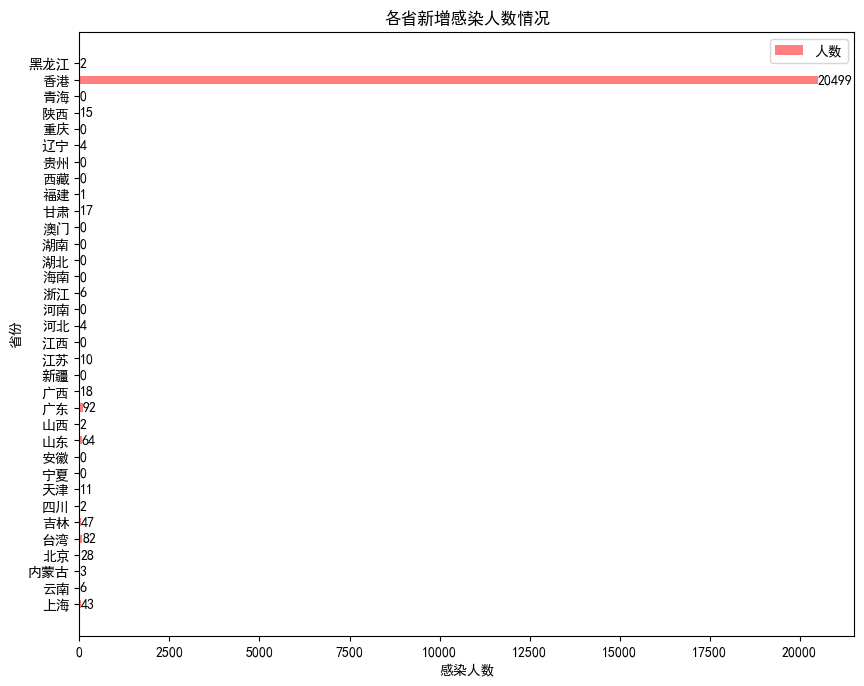

In [9]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
# 绘图
plt.figure(figsize = (10,8),dpi=100)  #调整图像大小与像素
plt.bar(x=0,bottom=area_data['省份'],height=0.5,width=area_data['新增感染'],orientation='horizontal',label='人数',color='red',alpha=0.5 )

#在柱状图上显示具体数值, ha参数控制水平对齐方式, va控制垂直对齐方式
for x1, yy in zip(area_data['新增感染'], area_data['省份']):
  plt.text(x1+1, yy , str(x1),  va='center', fontsize=10, rotation=0)
# 设置标题
plt.title("各省新增感染人数情况")
# 为两条坐标轴设置名称
plt.xlabel("感染人数")
plt.ylabel("省份")
# 显示图例
plt.legend(loc="upper right")
plt.show()
plt.close()

In [10]:
privince=[]
columns=[]
x=[]   # 把各省感染人数与各省对应
for i in range(len(area_data)):
    privince.append(area_data.loc[i]['省份'])
    columns.append(int(area_data.loc[i]['新增感染']))
for z in zip(list(privince), list(columns)):
    list(z)
    x.append(z)


In [11]:
from pyecharts.charts import Map
import pyecharts.options as opts
from pyecharts import options
from pyecharts.globals import ChartType
area_map = Map()
area_map.add("中国疫情新增感染人数分布图\n19122251\t王浩丞",x, "china",is_map_symbol_show=False)
area_map.set_global_opts(title_opts=opts.TitleOpts(title="中国疫情新增感染人数分布地图\n19122251\t王浩丞"),visualmap_opts=opts.VisualMapOpts(is_piecewise=True,
              pieces=[
                    {"min": 200, "label": '>200人', "color": "#6F171F"},
                    {"min": 100, "max": 199, "label": '100-199人', "color": "#C92C34"},
                    {"min": 50, "max": 99, "label": '50-99人', "color": "#E35B52"},
                    {"min": 10, "max": 49, "label": '10-49人', "color": "#F39E86"},
                    {"min": 1, "max": 9, "label": '1-9人', "color": "#FDEBD0"}]))
area_map.render_notebook()


In [12]:
url2 = "https://view.inews.qq.com/g2/getOnsInfo?name=disease_other"
resp=requests.get(url2)
listdata=[]
listdata=resp.json()
listdata2=json.loads(listdata['data'])

In [13]:
chinaDayList=listdata2['chinaDayList']  #将原数据文本中国记录的疫情数据（字典形式）装入一个数列
i=len(chinaDayList) #计算从开始统计疫情数据到今日为止的天数
china_date=pd.DataFrame()
for n in range(i):
    pd1=pd.DataFrame(data=chinaDayList[n],index=[n],columns=['confirm','dead','heal','nowConfirm','nowSevere','healRate','date'])
    china_date=china_date.append(pd1)
china_date=china_date.rename(columns={"confirm":"累计确诊","dead":"累计死亡","heal":"累计治愈","nowConfirm":"现有确诊","nowSevere":"本土新增","healRate":"治愈率","date":"日期"})
print('\n全国疫情累计情况（展示最后五条）')
china_date.tail()


全国疫情累计情况（展示最后五条）


,累计确诊,累计死亡,累计治愈,现有确诊,本土新增,治愈率,日期
55,269138,6855,136788,125495,18,50.8,03.03
56,300851,7043,137402,156406,14,45.7,03.04
57,319225,7263,138250,173712,14,43.3,03.05
58,338496,7496,139056,191944,11,41.1,03.06
59,344585,7776,139554,197255,9,40.5,03.07


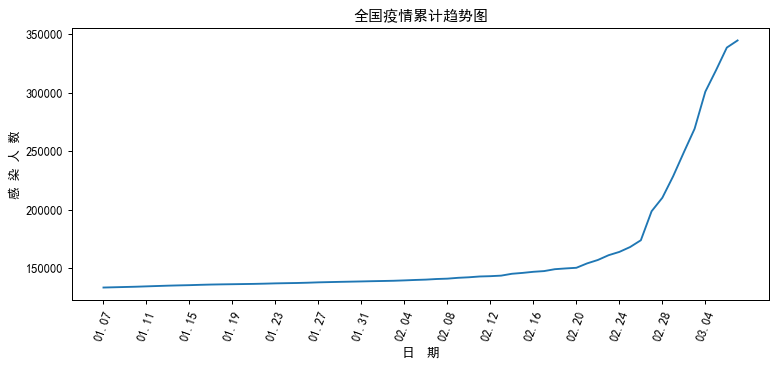

In [14]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10,4),dpi=90)    #调整大小，清晰度
plt.xticks(rotation=70)      #字体倾斜
x=np.array(china_date['日期'])
y=np.array(china_date['累计确诊'])
plt.xticks(range(0,i,4))
plt.plot(x,y)
plt.title('全国疫情累计趋势图')
plt.xlabel("日  期")
plt.ylabel("感 染 人 数")
plt.show()

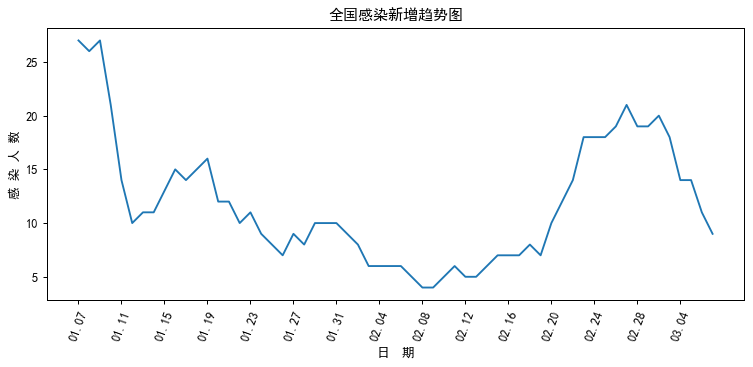

In [15]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10,4),dpi=90)    #调整大小，清晰度
plt.xticks(rotation=70)      #字体倾斜
x=np.array(china_date['日期'])
y=np.array(china_date['本土新增'])
plt.xticks(range(0,i,4))
plt.plot(x,y)
plt.title('全国感染新增趋势图')
plt.xlabel("日  期")
plt.ylabel("感 染 人 数")
plt.show()

In [16]:
url3="https://api.inews.qq.com/newsqa/v1/automation/modules/list?modules=FAutoCountryConfirmAdd,WomWorld,WomAboard"
resp=requests.get(url3)
listdata=[]
listdata=resp.json()
import re
areaTree=json.loads(re.sub('\'','\"',str(listdata['data']['WomAboard'])))

In [17]:
country_list=pd.DataFrame()
for a in range(len(areaTree)):
    pd1=pd.DataFrame(areaTree[a],index=[a],columns=['name','continent','y','date','confirmAdd','confirm','dead','heal','nowConfirm'])
    country_list=country_list.append(pd1)
country_list=country_list.rename(columns={"name":"名字","continent":"所属大洲","y":"年","date":"日期","confirmAdd":"新增","confirm":"感染","dead":"死亡","heal":"治愈","nowConfirm":"现存感染人数"})
print('\n展示前10条记录')
country_list.head(10)


展示前10条记录


,名字,所属大洲,年,日期,新增,感染,死亡,治愈,现存感染人数
0,美国,北美洲,2022,03.08,25751,80979977,985914,55013011,24981052
1,印度,亚洲,2022,03.08,3993,42971308,515241,42406150,49917
2,巴西,南美洲,2022,03.08,20456,29069469,652418,27179192,1237859
3,法国,欧洲,2022,03.08,14496,23071822,139451,21738280,1194091
4,英国,欧洲,2022,03.08,42040,19245301,162147,18022989,1060165
5,俄罗斯,欧洲,2022,03.08,73162,17014818,356949,14690595,1967274
6,德国,欧洲,2022,03.08,122895,15951350,124716,12287900,3538734
7,土耳其,亚洲,2022,03.08,34343,14388231,95681,13813131,479419
8,意大利,欧洲,2022,03.08,22083,13048774,156017,11884397,1008360
9,西班牙,欧洲,2022,03.08,11999,11136425,100574,10099142,936709


In [18]:
# 创建一个空列表，用来装每个国家的相关数据
info_list = []
name2=[]
confirm2=[]
# 遍历轮询每个国家的信息
for a in range(len(areaTree)):    # 提取国家名称
    name = areaTree[a]['name']
    name2.append(name)  #  提取每个国家的确诊人数
    confirm = int(areaTree[a]["confirmAdd"])
    confirm2.append(confirm)   #把每个国家和新增确诊人数放在一个元组里，然后添加到列表中
    info_tuple = (name,confirm)
    info_list.append(info_tuple)

In [19]:
#  将各国中文名与英文名对应
nameMap = {
        'Singapore Rep.':'新加坡',
        'Dominican Rep.':'多米尼加',
        'Palestine':'巴勒斯坦',
        'Bahamas':'巴哈马',
        'Timor-Leste':'东帝汶',
        'Afghanistan':'阿富汗',
        'Guinea-Bissau':'几内亚比绍',
        "Côte d'Ivoire":'科特迪瓦',
        'Siachen Glacier':'锡亚琴冰川',
        "Br. Indian Ocean Ter.":'英属印度洋领土',
        'Angola':'安哥拉',
        'Albania':'阿尔巴尼亚',
        'United Arab Emirates':'阿联酋',
        'Argentina':'阿根廷',
        'Armenia':'亚美尼亚',
        'French Southern and Antarctic Lands':'法属南半球和南极领地',
        'Australia':'澳大利亚',
        'Austria':'奥地利',
        'Azerbaijan':'阿塞拜疆',
        'Burundi':'布隆迪',
        'Belgium':'比利时',
        'Benin':'贝宁',
        'Burkina Faso':'布基纳法索',
        'Bangladesh':'孟加拉国',
        'Bulgaria':'保加利亚',
        'The Bahamas':'巴哈马',
        'Bosnia and Herz.':'波斯尼亚和黑塞哥维那',
        'Belarus':'白俄罗斯',
        'Belize':'伯利兹',
        'Bermuda':'百慕大',
        'Bolivia':'玻利维亚',
        'Brazil':'巴西',
        'Brunei':'文莱',
        'Bhutan':'不丹',
        'Botswana':'博茨瓦纳',
        'Central African Rep.':'中非',
        'Canada':'加拿大',
        'Switzerland':'瑞士',
        'Chile':'智利',
        'China':'中国',
        'Ivory Coast':'象牙海岸',
        'Cameroon':'喀麦隆',
        'Dem. Rep. Congo':'刚果民主共和国',
        'Congo':'刚果',
        'Colombia':'哥伦比亚',
        'Costa Rica':'哥斯达黎加',
        'Cuba':'古巴',
        'N. Cyprus':'北塞浦路斯',
        'Cyprus':'塞浦路斯',
        'Czech Rep.':'捷克',
        'Germany':'德国',
        'Djibouti':'吉布提',
        'Denmark':'丹麦',
        'Algeria':'阿尔及利亚',
        'Ecuador':'厄瓜多尔',
        'Egypt':'埃及',
        'Eritrea':'厄立特里亚',
        'Spain':'西班牙',
        'Estonia':'爱沙尼亚',
        'Ethiopia':'埃塞俄比亚',
        'Finland':'芬兰',
        'Fiji':'斐',
        'Falkland Islands':'福克兰群岛',
        'France':'法国',
        'Gabon':'加蓬',
        'United Kingdom':'英国',
        'Georgia':'格鲁吉亚',
        'Ghana':'加纳',
        'Guinea':'几内亚',
        'Gambia':'冈比亚',
        'Guinea Bissau':'几内亚比绍',
        'Eq. Guinea':'赤道几内亚',
        'Greece':'希腊',
        'Greenland':'格陵兰',
        'Guatemala':'危地马拉',
        'French Guiana':'法属圭亚那',
        'Guyana':'圭亚那',
        'Honduras':'洪都拉斯',
        'Croatia':'克罗地亚',
        'Haiti':'海地',
        'Hungary':'匈牙利',
        'Indonesia':'印度尼西亚',
        'India':'印度',
        'Ireland':'爱尔兰',
        'Iran':'伊朗',
        'Iraq':'伊拉克',
        'Iceland':'冰岛',
        'Israel':'以色列',
        'Italy':'意大利',
        'Jamaica':'牙买加',
        'Jordan':'约旦',
        'Japan':'日本',
        'Japan':'日本本土',
        'Kazakhstan':'哈萨克斯坦',
        'Kenya':'肯尼亚',
        'Kyrgyzstan':'吉尔吉斯斯坦',
        'Cambodia':'柬埔寨',
        'Korea':'韩国',
        'Kosovo':'科索沃',
        'Kuwait':'科威特',
        'Lao PDR':'老挝',
        'Lebanon':'黎巴嫩',
        'Liberia':'利比里亚',
        'Libya':'利比亚',
        'Sri Lanka':'斯里兰卡',
        'Lesotho':'莱索托',
        'Lithuania':'立陶宛',
        'Luxembourg':'卢森堡',
        'Latvia':'拉脱维亚',
        'Morocco':'摩洛哥',
        'Moldova':'摩尔多瓦',
        'Madagascar':'马达加斯加',
        'Mexico':'墨西哥',
        'Macedonia':'马其顿',
        'Mali':'马里',
        'Myanmar':'缅甸',
        'Montenegro':'黑山',
        'Mongolia':'蒙古',
        'Mozambique':'莫桑比克',
        'Mauritania':'毛里塔尼亚',
        'Malawi':'马拉维',
        'Malaysia':'马来西亚',
        'Namibia':'纳米比亚',
        'New Caledonia':'新喀里多尼亚',
        'Niger':'尼日尔',
        'Nigeria':'尼日利亚',
        'Nicaragua':'尼加拉瓜',
        'Netherlands':'荷兰',
        'Norway':'挪威',
        'Nepal':'尼泊尔',
        'New Zealand':'新西兰',
        'Oman':'阿曼',
        'Pakistan':'巴基斯坦',
        'Panama':'巴拿马',
        'Peru':'秘鲁',
        'Philippines':'菲律宾',
        'Papua New Guinea':'巴布亚新几内亚',
        'Poland':'波兰',
        'Puerto Rico':'波多黎各',
        'Dem. Rep. Korea':'朝鲜',
        'Portugal':'葡萄牙',
        'Paraguay':'巴拉圭',
        'Qatar':'卡塔尔',
        'Romania':'罗马尼亚',
        'Russia':'俄罗斯',
        'Rwanda':'卢旺达',
        'W. Sahara':'西撒哈拉',
        'Saudi Arabia':'沙特阿拉伯',
        'Sudan':'苏丹',
        'S. Sudan':'南苏丹',
        'Senegal':'塞内加尔',
        'Solomon Is.':'所罗门群岛',
        'Sierra Leone':'塞拉利昂',
        'El Salvador':'萨尔瓦多',
        'Somaliland':'索马里兰',
        'Somalia':'索马里',
        'Serbia':'塞尔维亚',
        'Suriname':'苏里南',
        'Slovakia':'斯洛伐克',
        'Slovenia':'斯洛文尼亚',
        'Sweden':'瑞典',
        'Swaziland':'斯威士兰',
        'Syria':'叙利亚',
        'Chad':'乍得',
        'Togo':'多哥',
        'Thailand':'泰国',
        'Tajikistan':'塔吉克斯坦',
        'Turkmenistan':'土库曼斯坦',
        'East Timor':'东帝汶',
        'Trinidad and Tobago':'特里尼达和多巴哥',
        'Tunisia':'突尼斯',
        'Turkey':'土耳其',
        'Tanzania':'坦桑尼亚',
        'Uganda':'乌干达',
        'Ukraine':'乌克兰',
        'Uruguay':'乌拉圭',
        'United States':'美国',
        'Uzbekistan':'乌兹别克斯坦',
        'Venezuela':'委内瑞拉',
        'Vietnam':'越南',
        'Vanuatu':'瓦努阿图',
        'West Bank':'西岸',
        'Yemen':'也门',
        'South Africa':'南非',
        'Zambia':'赞比亚',
        'Zimbabwe':'津巴布韦'
}

In [20]:
during = [               # 定义感染人数的等级
    {"min":1000000},
    {"min": 100000, "max":999999},
    {"min": 10000, "max": 99999},
    {"min": 1000, "max": 9999},
    {"min": 100, "max": 999},
    {"min":0,"max":99},
]

In [21]:
map = Map(opts.InitOpts(width='1000px',height='600px')).add(series_name="",
                # 要展示的数据项
                data_pair=info_list,
                # 地图类型为世界地图
                maptype="world",
                # 自定义读取的名称的映射
                name_map=nameMap,
                # 是否显示标记图形
                is_map_symbol_show=False)
# label_opts:标签配置项设置，is_show：是否显示视觉映射配置
map.set_series_opts(label_opts=opts.LabelOpts(is_show=False))


In [22]:
#is_piecewise：是否为分段展示，pieces：设置每一个区间的范围
#max_：设置 visualMapPiecewise 所有取值区间中的最大值，TitleOpts：标题设置
map.set_global_opts(
        title_opts=opts.TitleOpts(pos_left="40px",title="世界新增疫情分布情况地图（我国除外）\n19122251\t王浩丞",subtitle_textstyle_opts=opts.TextStyleOpts(font_size=20)),
        legend_opts=opts.LegendOpts(selected_mode='multiple'),
        visualmap_opts=opts.VisualMapOpts(max_=10000000,is_piecewise=True,pieces=during),
        )
map.render_notebook()